In [49]:
import warnings

warnings.simplefilter("ignore")
import numpy as np

np.seterr(all="ignore")

# %%capture
import matplotlib.pyplot as plt
from pathlib import Path
from threeML import *
from threeML.io.package_data import get_path_of_data_file

# we will need XPSEC models for extinction
from astromodels.xspec import *
from astromodels.xspec.xspec_settings import *

from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
set_threeML_style()
silence_warnings()

In [50]:
dir = '/home/arpan-john/Desktop/cans/GRBC_bn110102432/current'

import os
import glob
from Calculating_det_angles import estimate_source_angles_detectors  # Importing ma'am's function
from astropy.io import fits

# Finding Trigdat file
trig_string = "_trigdat_"
trig_pattern = os.path.join(dir, f"*{trig_string}*")
trigdat_file = glob.glob(trig_pattern)

print(trigdat_file)

for s in trigdat_file[0].split('_'):
    if 'bn' in s:
        trigger = s
        break
print(trigger)

# Getting the RA and DEC
with fits.open(trigdat_file[0], memmap=True) as pha_list:
    ra_obj, dec_obj = (pha_list[0].header['RA_OBJ']), (pha_list[0].header['DEC_OBJ'])

brightest_nai, bright_nais, brightest_bgo = estimate_source_angles_detectors.angle_to_grb(ra_obj, dec_obj,trigdat_file[0])

print(brightest_nai)
print(bright_nais)
print(brightest_bgo)

# Finding TTE files
tte_string = "_tte_"
tte_pattern = os.path.join(dir, f"*{tte_string}*")
tte_files = glob.glob(tte_pattern)
tte_files.sort()
print(tte_files)

# Finding rsp files
rsp_string = ".rsp"
rsp_pattern = os.path.join(dir, f"*{rsp_string}*")
rsp_files = glob.glob(rsp_pattern)

for file in rsp_files:
    if 'ctime' in file:
        rsp_files.remove(file)
        continue
    if 'ctime' in file.split('_'):
        rsp_files.remove(file)
        
rsp_files.sort()
print(rsp_files)


['/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_trigdat_all_bn110102432_v02.fit']
bn110102432/current/glg
 
The brightest NaI detector is n3 - Source angle is: 15 deg
The brightest 3 NaI detectors are n3 ( 15 deg) n0 ( 47 deg) n5 ( 48 deg)
The brightest BGO detector is b0 ( 46 deg )
n3
['n3', 'n0', 'n5']
['b0']
['/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_tte_b0_bn110102432_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_tte_b1_bn110102432_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_tte_n0_bn110102432_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_tte_n1_bn110102432_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_tte_n2_bn110102432_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_tte_n3_bn110102432_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_tte_n4_bn110102432_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn110102432/cu

In [51]:
NaI_detectors = []
rsp_NaI_files = []
rsp2_NaI_files = []
for nai in bright_nais:
    for file in rsp_files:
        if 'ctime' in file:
            rsp_files.remove(file)
            continue
        elif brightest_bgo[0] in file and 'rsp2' in file:
            rsp2_BGO_file = [file]
            continue
        elif brightest_bgo[0] in file and 'rsp' in file:
            rsp_BGO_file = [file]
            continue
        elif nai in file and 'rsp2' in file:
            rsp2_NaI_files.append(file)
            continue
        elif nai in file and 'rsp' in file:
            rsp_NaI_files.append(file)
    for file in tte_files:
        if brightest_bgo[0] in file:
            BGO_detector = [file]
        if nai in file:
            NaI_detectors.append(file)
            break

# NaI_detectors =  NaI_detectors[0:2]
# rsp_NaI_files =  rsp_NaI_files[0:2]
# rsp2_NaI_files = rsp2_NaI_files[0:2]

print(NaI_detectors)
print(BGO_detector)
print(rsp_NaI_files)
print(rsp2_NaI_files)
print(rsp_BGO_file)
try:
    print(rsp2_BGO_file)
except:
    print('no rsp2 file')

tte_file = NaI_detectors[0]
with fits.open(tte_file, memmap=True) as hdul:
    all_count_data = hdul[2].data
    trigtime = hdul[2].header['TRIGTIME']

counts = all_count_data['TIME'].astype(float) - trigtime
cmin = counts.min()
cmax = counts.max()
print(f"Earliest count {cmin:.2f}, latest count {cmax:.2f}")

['/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_tte_n3_bn110102432_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_tte_n0_bn110102432_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_tte_n5_bn110102432_v00.fit']
['/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_tte_b0_bn110102432_v00.fit']
['/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_cspec_n3_bn110102432_v00.rsp', '/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_cspec_n0_bn110102432_v00.rsp', '/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_cspec_n5_bn110102432_v00.rsp']
[]
['/home/arpan-john/Desktop/cans/GRBC_bn110102432/current/glg_cspec_b0_bn110102432_v00.rsp']
no rsp2 file
Earliest count -30.66, latest count 300.28


In [52]:
# set background interval
background_interval = ["-30 - -5","10 - 30"]

Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

23:01:00 INFO      Auto-determined polynomial order: 3                                            ]8;id=826333;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=235659;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting GBM_NAI_03 background:   0%|          | 0/128 [00:00<?, ?it/s]

23:01:10 INFO      None 3-order polynomial fit with the mle method                               ]8;id=172226;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=548718;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Created 331 bins via constant                                         ]8;id=807893;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=16583;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

1577 11.287414223163848 time interval -0.6561680436134338 - 0.34383195638656616 (duration: 1.0)
1407 6.765733146249135 time interval 0.34383195638656616 - 1.3438319563865662 (duration: 1.0)
-0.6561680436134338
1.3438319563865662
time interval 2.0
[-0.6561680436134338, 1.3438319563865662]


23:01:12 INFO      Interval set to -0.66-1.34 for temp                                   ]8;id=154512;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=50967;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

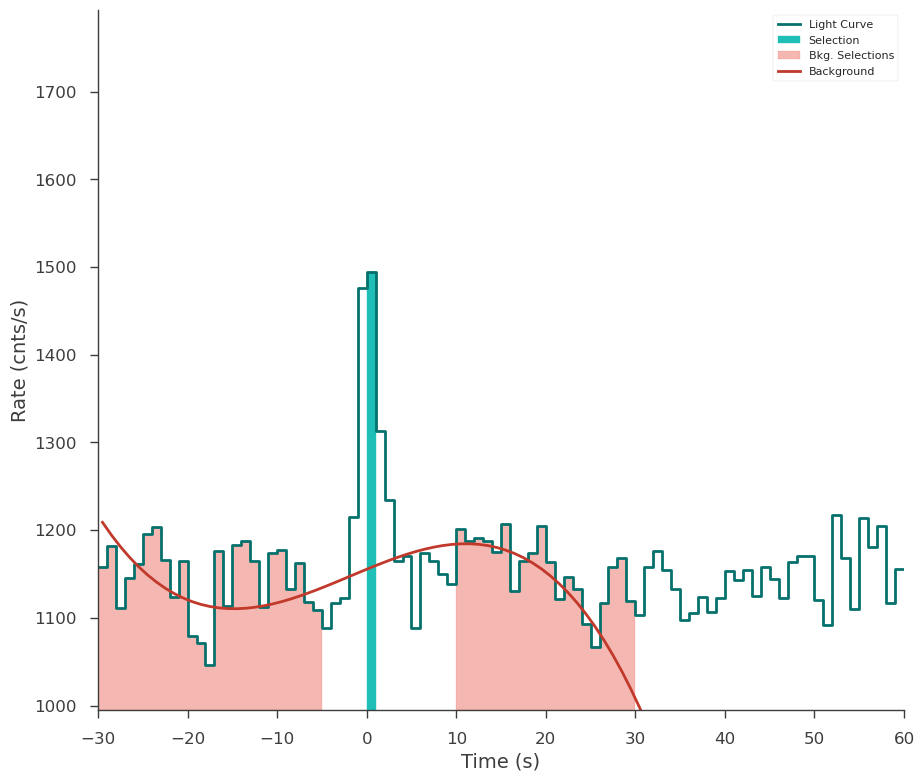

In [55]:
def find_act_inv(ts,cmin=cmin,cmax=cmax,type = 'long'):

    if type == 'long':
        dt = 1.024
    else:
        dt = 0.1
    ts.create_time_bins(start=cmin, stop=cmax, method='constant',dt = dt)
    skip = 0
    flag = 0
    for sig,tot,bins in zip (ts.significance_per_interval[skip:],ts.total_counts_per_interval[skip:],ts.bins[skip:]):
        if sig > 3.5:
            print(tot,sig,bins)        
        bins = str(bins)
        if sig > 3.5 and flag == 0:
            start = float(bins.split(' ')[2])
            flag = 1
        if sig < 3.5 and flag == 1:
            stop = float(bins.split(' ')[2])
            break
    print(start)
    print(stop)
    print('time interval', stop - start)
    if (stop - start) < 2 and type == 'long':
        print('may be a short GRB')
    return start,stop


temp_ts = TimeSeriesBuilder.from_gbm_tte(
        'temp', 
        tte_file=NaI_detectors[0], 
        rsp_file=rsp_NaI_files[0])
temp_ts.set_background_interval(*background_interval)
start , stop = find_act_inv(temp_ts)
print([start, stop])
# set interval
source_interval = f'{start:.2f} - {stop:.2f}'
source_tuple = (start,stop)
temp_ts.set_active_time_interval(source_interval)
fig = temp_ts.view_lightcurve(-30, 60, dt = 1)


detector n3


Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

23:02:16 INFO      Auto-determined polynomial order: 3                                            ]8;id=632034;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=424655;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting GBM_NAI_03 background:   0%|          | 0/128 [00:00<?, ?it/s]

23:02:27 INFO      None 3-order polynomial fit with the mle method                               ]8;id=356007;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=483840;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Created 324 bins via constant                                         ]8;id=120780;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=993493;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

         INFO      Interval set to -0.66-1.34 for n3                                     ]8;id=437058;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=151022;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=811419;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=699538;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=888040;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=500526;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=75205;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=514933;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 5-124                                    ]8;id=9573;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=541393;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 120 bins                                                          ]8;id=499960;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=988953;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

detector n0


Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

23:02:28 INFO      Auto-determined polynomial order: 3                                            ]8;id=184972;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=155145;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting GBM_NAI_00 background:   0%|          | 0/128 [00:00<?, ?it/s]

23:02:37 INFO      None 3-order polynomial fit with the mle method                               ]8;id=390651;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=204925;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Created 324 bins via constant                                         ]8;id=421613;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=867384;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

         INFO      Interval set to -0.66-1.34 for n0                                     ]8;id=459715;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=106733;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

23:02:38 INFO      Auto-probed noise models:                                                    ]8;id=460716;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=529889;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=639819;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=985985;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=670995;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=87790;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 4-123                                    ]8;id=537957;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=955425;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 120 bins                                                          ]8;id=414537;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=844285;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

detector n5


Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

         INFO      Auto-determined polynomial order: 3                                            ]8;id=35780;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=856244;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting GBM_NAI_05 background:   0%|          | 0/128 [00:00<?, ?it/s]

23:02:48 INFO      None 3-order polynomial fit with the mle method                               ]8;id=125602;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=607206;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Created 324 bins via constant                                         ]8;id=50022;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=381768;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

23:02:49 INFO      Interval set to -0.66-1.34 for n5                                     ]8;id=885163;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=297660;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=357102;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=867451;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=820075;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=51454;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=351700;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=600434;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 5-124                                    ]8;id=308798;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=775381;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 120 bins                                                          ]8;id=595136;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=987272;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

detector b0


Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

23:02:50 INFO      Auto-determined polynomial order: 3                                            ]8;id=572870;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=470965;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting GBM_BGO_00 background:   0%|          | 0/128 [00:00<?, ?it/s]

23:03:00 INFO      None 3-order polynomial fit with the mle method                               ]8;id=588619;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=546421;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Created 324 bins via constant                                         ]8;id=861590;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=112264;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

         INFO      Interval set to -0.66-1.34 for b0                                     ]8;id=359276;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=569587;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=153736;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=973075;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=500552;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=699215;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=412587;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=363209;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 250-30000 translates to channels 1-119                                ]8;id=465924;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=134741;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 119 bins                                                          ]8;id=733769;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=186985;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

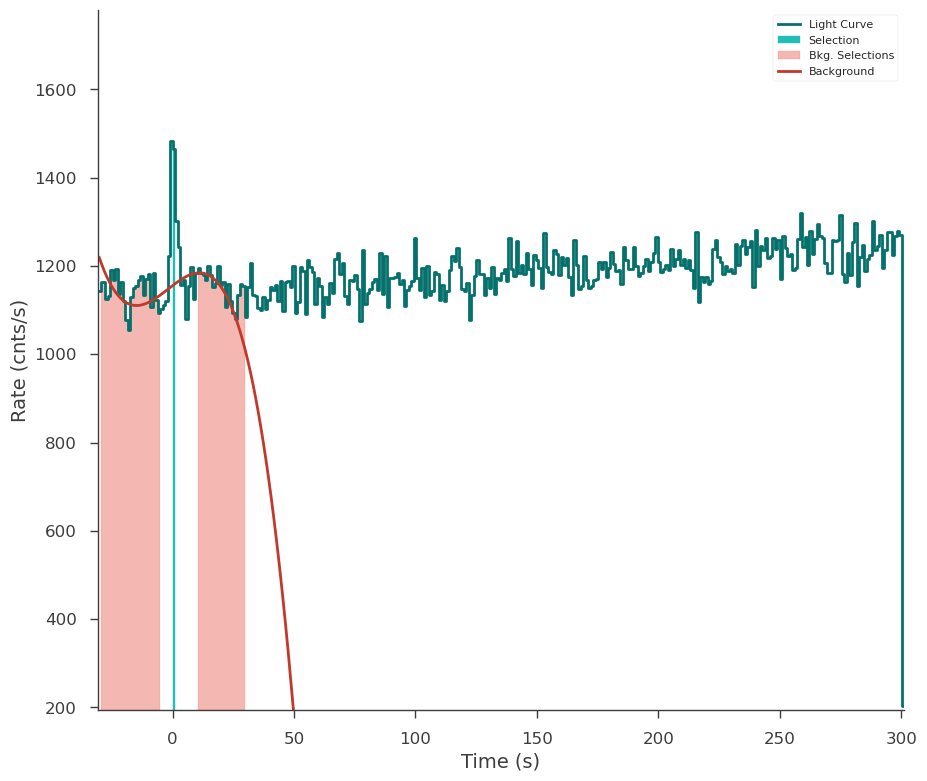

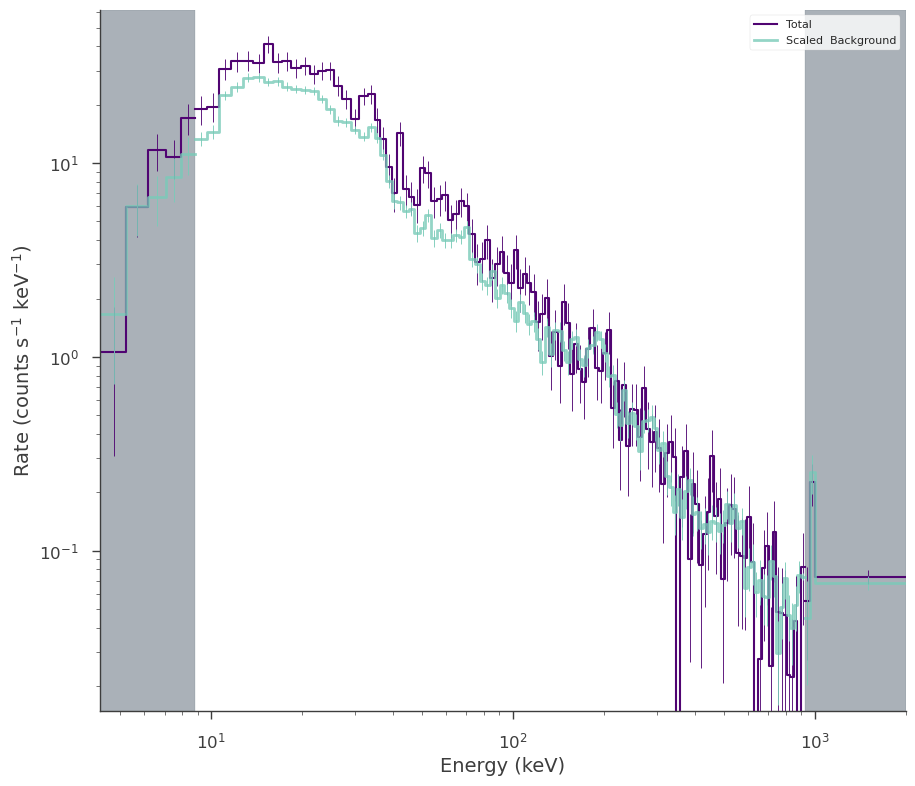

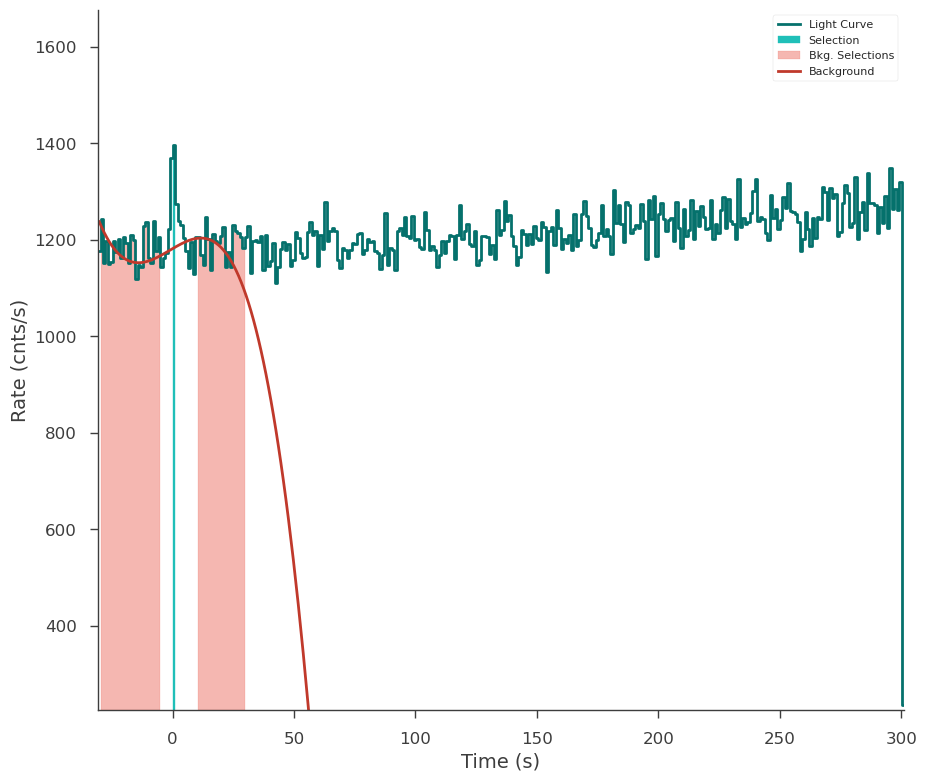

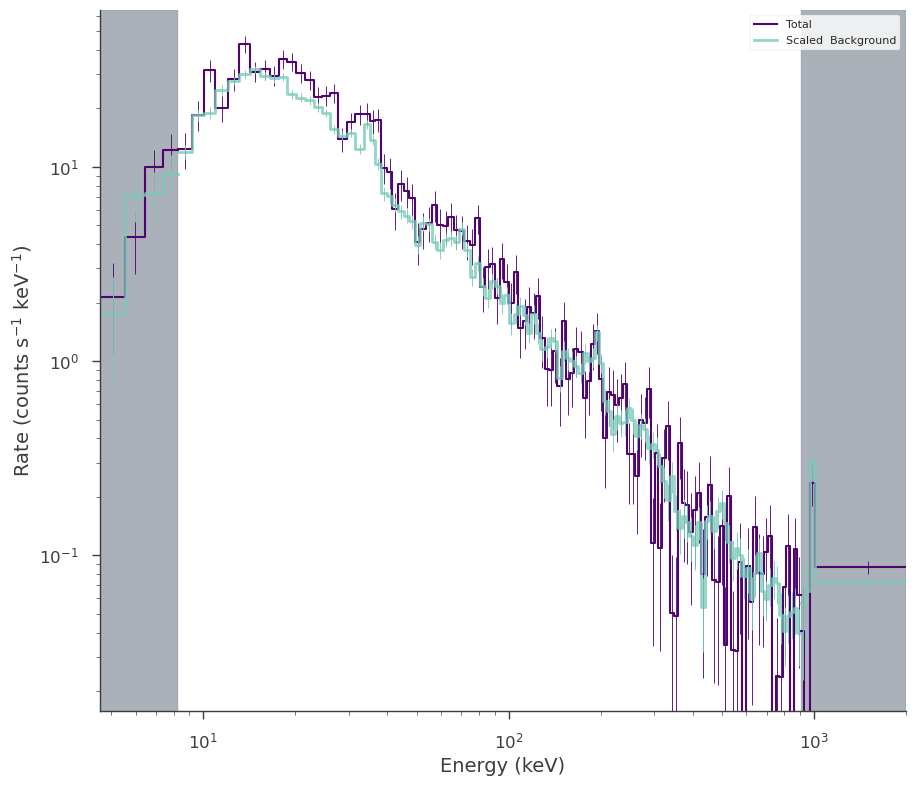

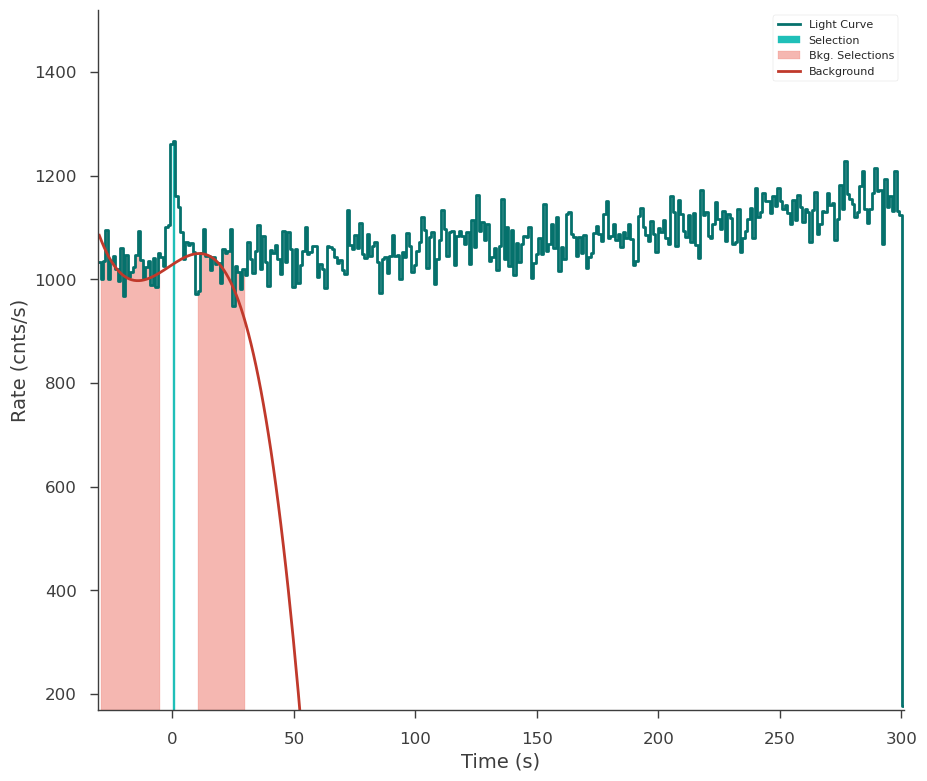

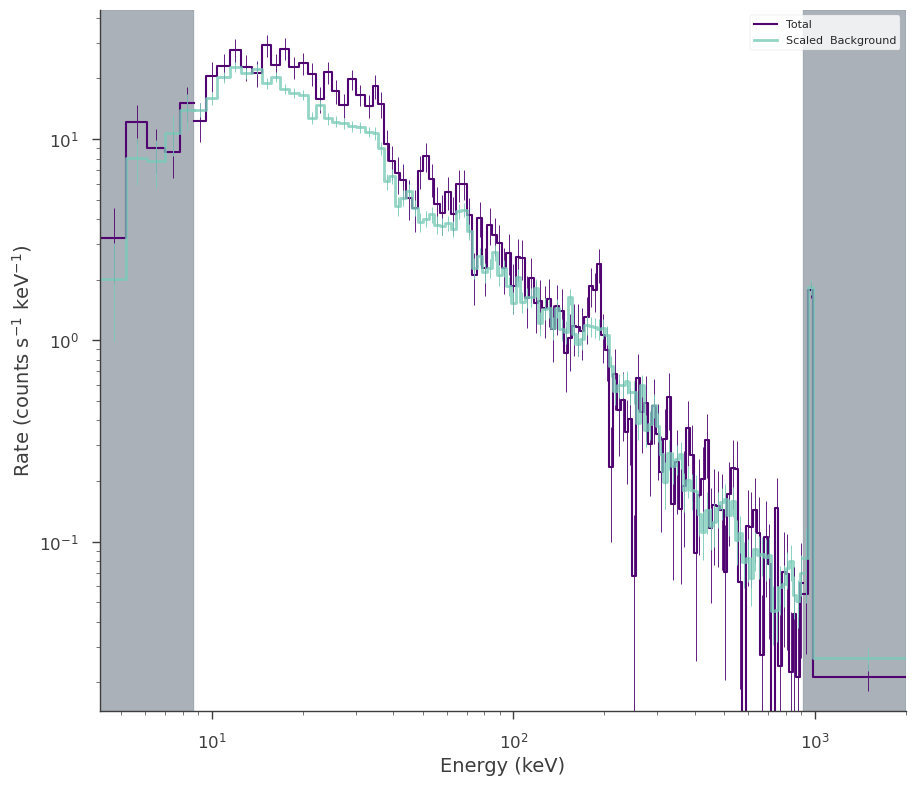

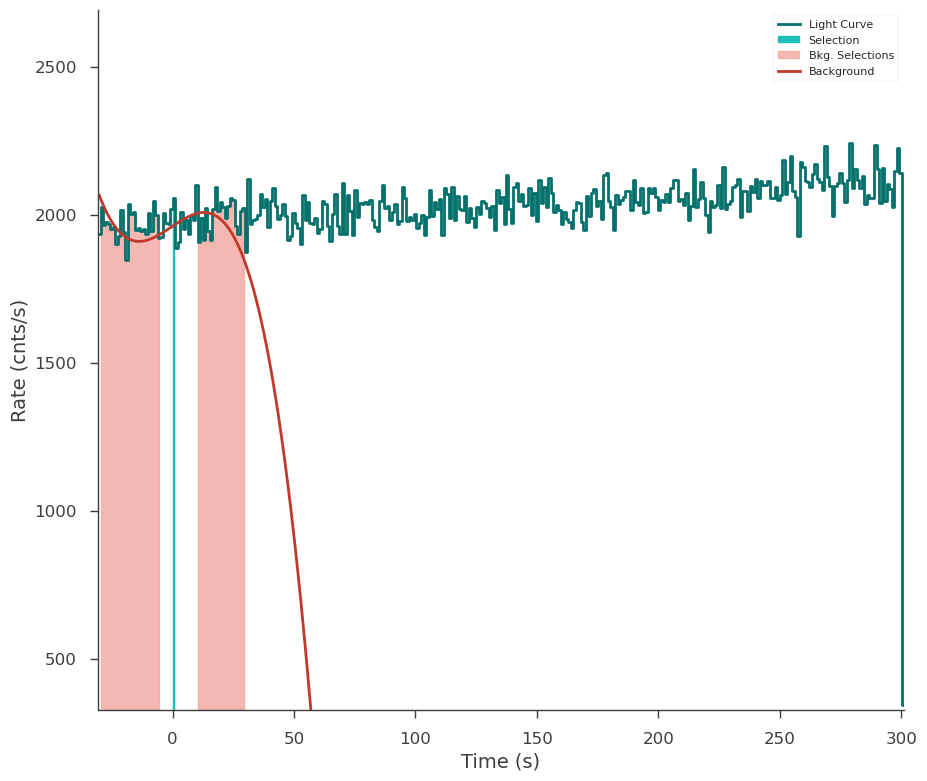

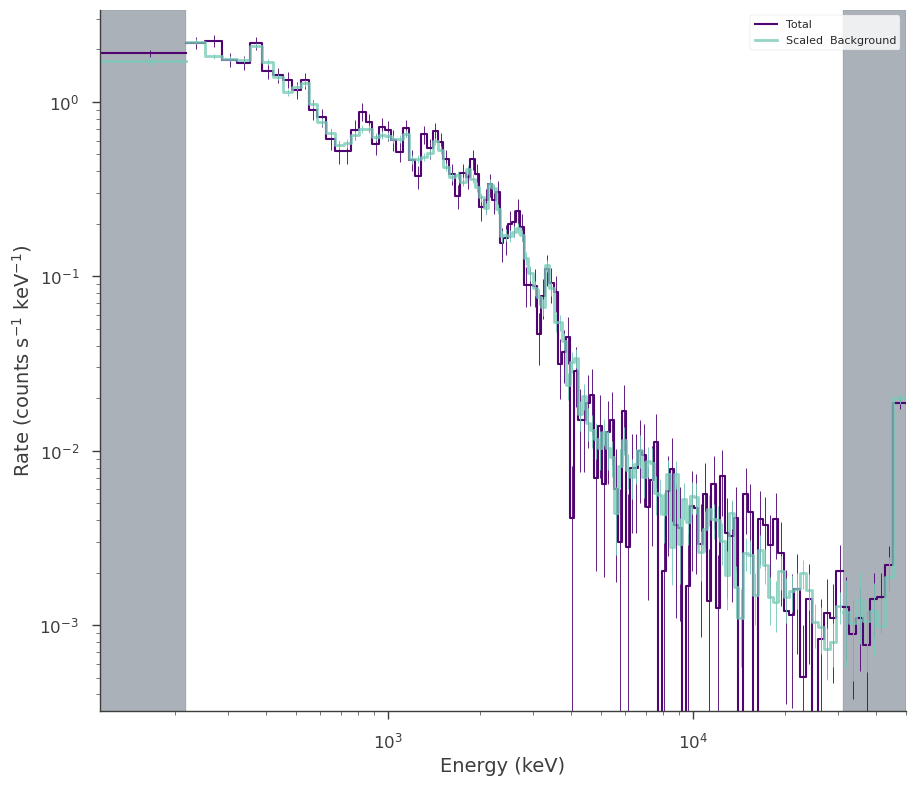

In [56]:
fluence_plugins = []
time_series = {}
for det,rsp in zip((NaI_detectors + BGO_detector),(rsp_NaI_files+rsp_BGO_file)):
    det_name = det.split('_')[-3]
    print('detector',det_name)
    ts = TimeSeriesBuilder.from_gbm_tte(
        det_name, tte_file=det, rsp_file=rsp
    )

    ts.set_background_interval(*background_interval)

    # # Bayes block method
    # ts.create_time_bins(
    #     start=-20.0, stop=50.0, method="bayesblocks", p0=0.01, use_background=True
    # )

    # bad_bins = []
    # for i, w in enumerate(ts.bins.widths):
    #     if w < 5e-2:
    #         bad_bins.append(i)


    # edges = [ts.bins.starts[0]]

    # for i, b in enumerate(ts.bins):
    #     if i not in bad_bins:
    #         edges.append(b.stop)

    # starts = edges[:-1]
    # stops = edges[1:]

    # if len(edges) < 4:
    #     continue

    # # selected_bins = select_bins_containing_interval(edges, source_tuple)
    # # source_interval = f'{edges[selected_bins[0]]:.2f} - {edges[1+selected_bins[-1]]:.2f}'

    # ts.create_time_bins(starts, stops, method="custom")

    dt = 1.024
    ts.create_time_bins(start=cmin, stop=cmax, method='constant',dt = dt)

    time_series[det_name] = ts

    ts.set_active_time_interval(source_interval)

    fig = ts.view_lightcurve(-10, 30,use_binner = True)

    fluence_plugin = ts.to_spectrumlike()

    if det_name.startswith("b"):
        fluence_plugin.set_active_measurements("250-30000")

    else:
        fluence_plugin.set_active_measurements("9-900")

    fluence_plugin.rebin_on_background(1.0)

    fig = fluence_plugin.view_count_spectrum()

    fluence_plugins.append(fluence_plugin)

In [43]:
print(gg)

NameError: name 'gg' is not defined

In [44]:
xspec_abund("angr")

spectral_model = XS_phabs() * XS_zphabs() * Powerlaw()# SmoothlyBrokenPowerLaw  # Band _grbm() # #  
# spectral_model = XS_grbm()

ptsrc = PointSource(trigger.split('/')[0], ra_obj, dec_obj, spectral_shape=spectral_model)
model = Model(ptsrc)

# data = DataList(*fluence_plugins)
data = DataList(fluence_plugins[0])

jl = JointLikelihood(model, data, verbose=False)
model.display()

 Solar Abundance Vector set to angr: 

20:37:05 INFO      set the minimizer to minuit                                             ]8;id=337141;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=549419;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1045\1045]8;;\

 Anders E. & Grevesse N. Geochimica et Cosmochimica Acta 53, 197 (1989)


Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (5):
--------------------

                                         value min_value  max_value  \
bn110102432.spectrum.main.composite.nh_1   1.0       0.0  1000000.0   
bn110102432.spectrum.main.composite.nh_2   1.0       0.0  1000000.0   
bn110102432...redshift_2                   0.0    -0.999       10.0   
bn110102432.spectrum.main.composite.K_3    1.0       0.0     1000.0   
bn110102432...index_3                    -2.01     -10.0       10.0   

                                                    unit  
bn110102432.spectrum.main.composite.nh_1                  
bn110102432.spectrum.main.composite.nh_2                  
bn110102432...redshift_2                                  
bn110102432.spectrum.main.composite.K_3   keV-1 s-1 cm-2  
bn110102432...index_3                                     

Fixed parameters (4):
(abridged. Use complete=True to see all fixed parameters)


Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

Best fit values:

,result,unit
parameter,,
bn110102432.spectrum.main.composite.nh_1,(0 +/- 8) x 10^-2,
bn110102432.spectrum.main.composite.nh_2,(4.2 +/- 2.8) x 10,
bn110102432.spectrum.main.composite.redshift_2,(-3.94 +/- 0.12) x 10^-1,
bn110102432.spectrum.main.composite.K_3,(3.6 -1.9 +4) x 10,1 / (keV s cm2)
bn110102432.spectrum.main.composite.index_3,-1.96 +/- 0.18,


Correlation matrix:

1.00,-0.00,0.00,-0.00,0.00
-0.00,1.00,-0.28,0.83,-0.78
0.00,-0.28,1.00,-0.24,0.22
-0.00,0.83,-0.24,1.00,-0.99
0.00,-0.78,0.22,-0.99,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
n3,566.761695
total,566.761695


Values of statistical measures:

,statistical measures
AIC,1144.049705
BIC,1157.460848


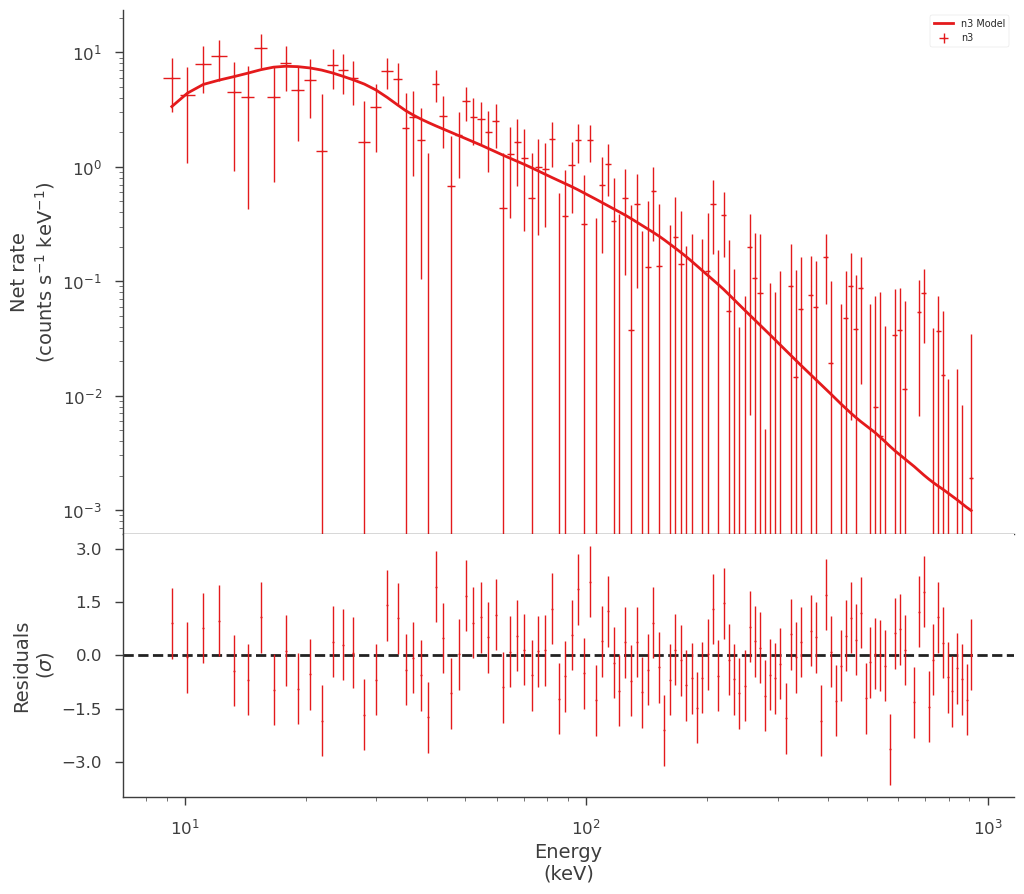

In [45]:
res = jl.fit()
fig = display_spectrum_model_counts(jl)

In [ ]:
gof_obj = GoodnessOfFit(jl)

gof, data_frame, like_data_frame = gof_obj.by_mc(
    n_iterations=100, continue_on_failure=True
)

print(gof)

Goodness of fit computation:   0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
like_df = res[1]
param_df = res[0]

Goodness of fit (p-value:) 0.26
Meaning that 26.0% of simulations have a larger (worse) likelihood
and 74.0% of simulations have a smaller (better) likelihood than seen in data


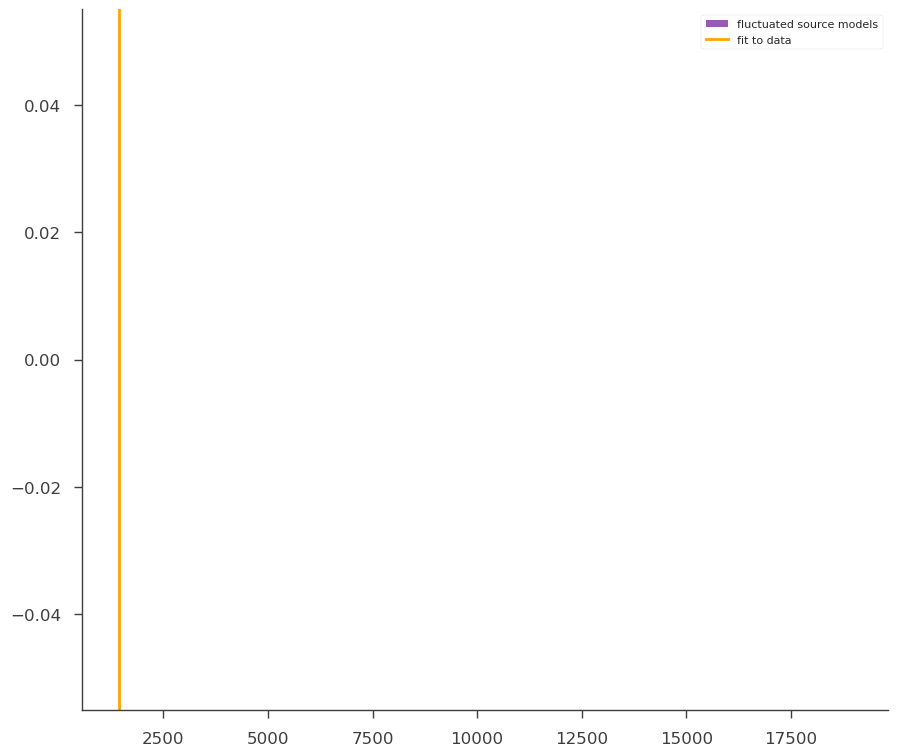

In [ ]:
p = gof["total"]

print("Goodness of fit (p-value:)", p)
print(f"Meaning that {100*p:.1f}% of simulations have a larger (worse) likelihood")
print(f"and {100*(1-p):.1f}% of simulations have a smaller (better) likelihood than seen in data")

df = like_data_frame.reset_index()
df = df[df.level_1 == "total"]

fig, ax = plt.subplots()
ax.hist(df["-log(likelihood)"], label = "fluctuated source models", bins=range(18000,19000,50))
ax.axvline(like_df.loc["total","-log(likelihood)"], label = "fit to data", color = "orange" )
ax.xlabel = "-log(likelihood)"
ax.legend(loc="best")

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 0, 'Energy [TeV]')

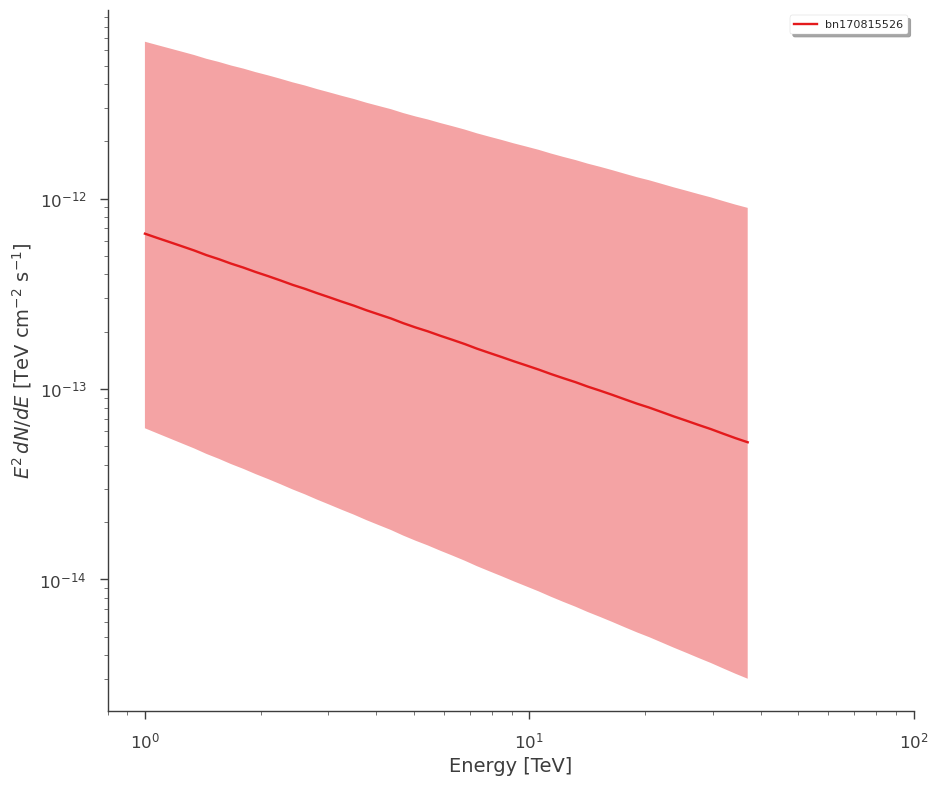

In [ ]:
fig, ax = plt.subplots()
results=jl.results
plot_spectra(results,
                   ene_min=1.0,
                   ene_max=37,
                   num_ene=50,
                   energy_unit='TeV',
                   flux_unit='TeV/(s cm2)',
                   subplot = ax)
ax.set_xlim(0.8,100)
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")

Profiling likelihood:   0%|          | 0/400 [00:00<?, ?it/s]

18:36:46 ERROR     Requested low range for parameter bn170815526.spectrum.main.XS_grbm.tem  ]8;id=526517;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=145378;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#581\581]8;;\
                  (param_2_minim) is below parameter minimum (min2)                                                

ForbiddenRegionOfParameterSpace: 

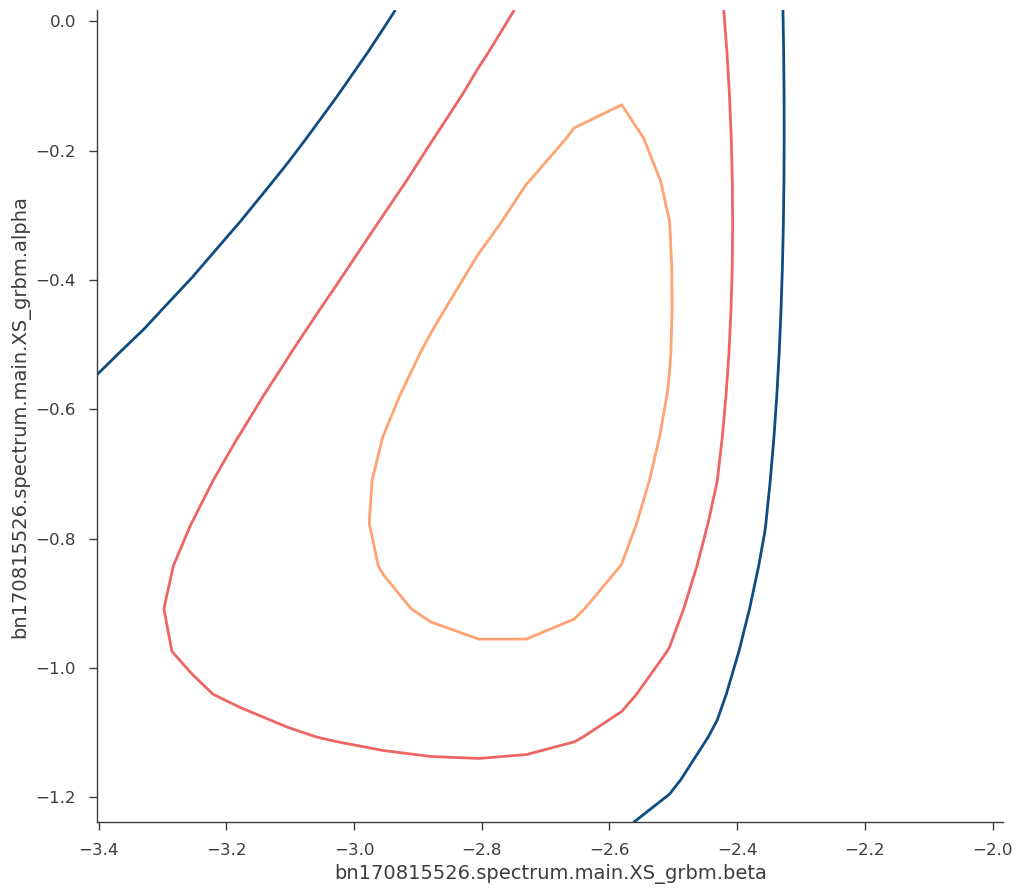

In [ ]:
range_min = {}
range_max = {}

params = model.free_parameters
N_param = len(model.free_parameters.keys() )

for name in params:
    row = param_df.loc[name]
    range_min[name] = row["value"] + 5*row["negative_error"]
    range_max[name] = row["value"] + 5*row["positive_error"]

for i in range(0,N_param):
    p1 = list(params.keys())[i]
    p2 = list(params.keys())[(i+1)%N_param]

    a, b, cc, fig = jl.get_contours(p1, range_min[p1], range_max[p1], 20,
                                p2, range_min[p2], range_max[p2], 20 )